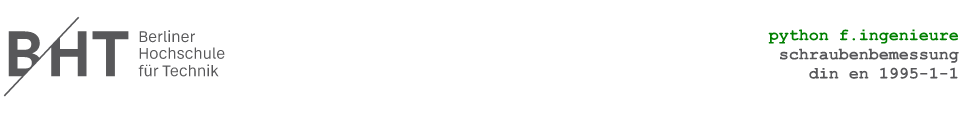

# Anwendungsbeispiel 2: Schraubenbemessung 

## Grundlagen zur Bemessung von Holzschrauben
### Einleitung
In den folgenden Kapiteln werden verschiedene Anwendungsbeispiele angeführt, die die Tragfähigkeit von Vollgewindeschrauben nach der DIN EN 1995-1-1: 2010-12 Absatz 8 ermitteln. Vollgewindeschrauben gehören mit Stabdübeln, Passbolzen, Bolzen, Gewindestangen und Nägeln zu den metallischen stiftförmigen Verbindungsmitteln. Die Tragfähigkeit wird grundsätzlich hinsichtlich einer Beanspruchung rechtwinklig (Abscheren) und in Richtung (Herausziehen) der Längsachse untersucht. Beim Abscheren wird das Verbindungsmittel auf Biegung beansprucht und überträgt Scherkräfte über Lochleibungsspannungen in das Holz. In Stabachse werden Zugkräfte durch die Verzahnung des Gewindes übertragen (vgl. Neuhaus 2017: 393).

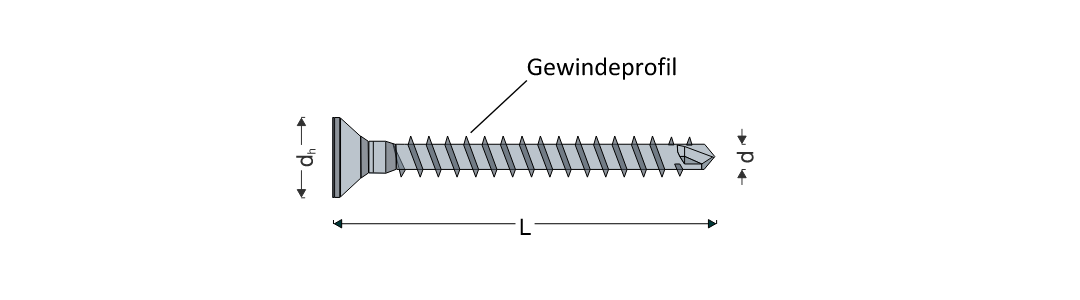

Holzschrauben müssen den Standards der Produktnormen DIN EN 14592: 2009-02 und 2012-11.1 entsprechen und benötigen bei Abweichungen einen bauaufsichtlichen Verwendbarkeitsnachweis (vgl. Neuhaus 2017: 466). Für die nachfolgenden Betrachtungen wird eine selbstbohrende Vollgewindeschraube der Firma Würth (ASSY plus VG) verwendet, die in der Europäischen Technischen Zulassung ETA-11/0190 zertifiziert ist.

Im Holzbau ist die Wahl und die Art der Verbindungsmittel maßgebend entscheidend für die Bauteilabmessungen. Sie vereinen Tragelemente zu statischen Tragstrukturen und können auf unterschiedlicher Weise ausgeführt werden. Grundsätzlich können Verbindungsmittel nach ihrer Anwendung und nach ihrer Nachgiebigkeit unterschieden werden. Im Holzingenieursbau kommen meist Verbindungen, wie Stahlformen, und mechanische Verbindungen, wie Nägel und Schrauben zum Einsatz. Die Nachgiebigkeit einer Verbindung entspricht der Steifigkeit bei mechanischer Belastung und hat einen entscheidenden Einfluss auf die globalen Verformungen eines Bauwerks (vgl. Becker/Rautenstrauch 2012: 92).

Hinzu trägt die Konzeptionierung der Holzverbindungen zur Zirkularität eines Gebäudes bei, da bei der Verwendung von einfachen Stahlverbindungen eine Rückbaubarkeit ermöglicht wird, sodass nach dem Lebenszyklus die Materialien in die Kreislaufwirtschaft wieder eingeführt werden können.

### Axialtragfähigkeit

Die folgende Abbildung zeigt eine Verbindung eines Balkens mit einem Unterzug und den Einsatz einer Zugschraube. Der Balken lagert auf einer Auflagerfläche und überträgtquer zur Faserrichtung eine Druckkraft. Durch die exzentrische Krafteinleitung entsteht ein Torsionsmoment im Unterzug (1). Dieses Moment löst eine Kippbewegung aus, welches das Auflager des Balkens entziehen würde. Durch die Platzierung der Holzschraube im unteren Zugbereich (2), wird das Torsionsmoment über einen vertikalen Hebelarm in eine Zug- und Druckkomponente abgebaut, sodass eine biegesteife Verbindung gewährleistet wird. 

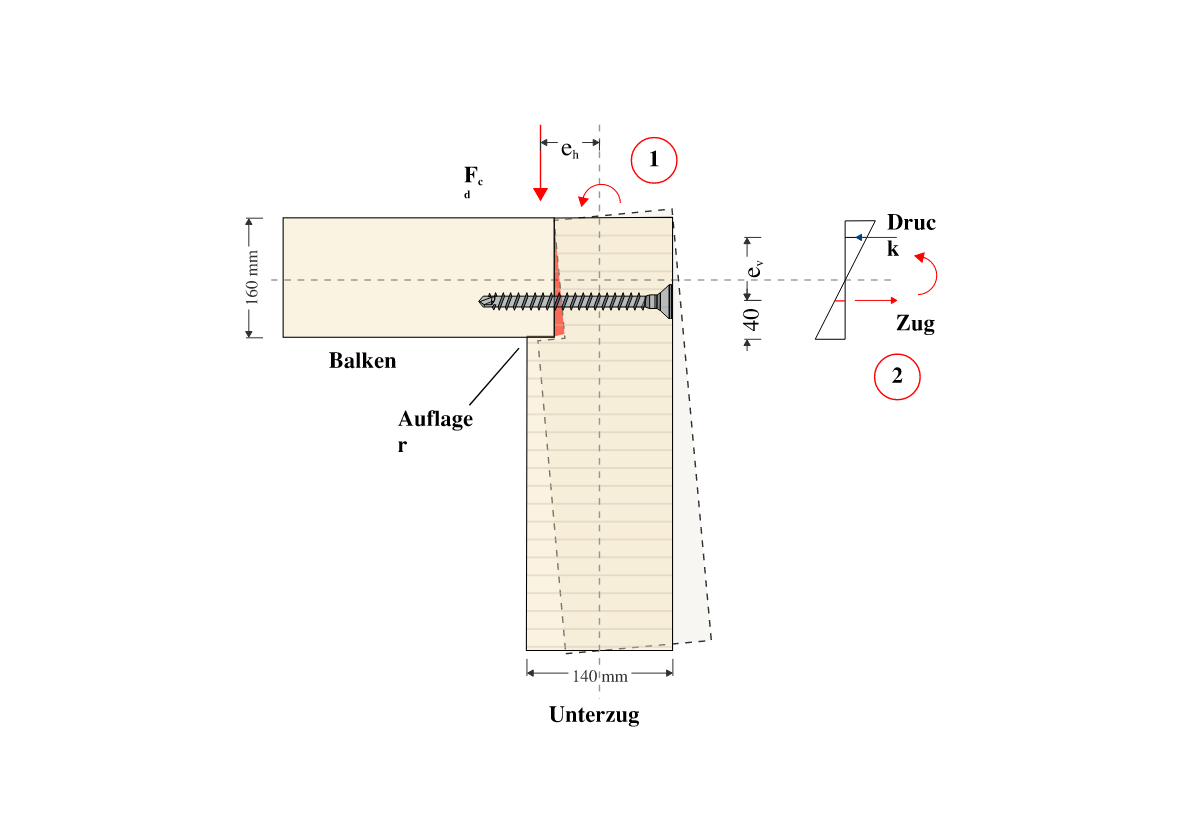

Die Bemessung des Widerstands einer Holzschraube in Stabachse nach der DIN EN 1995-1-1 Abs. 8.7.2 erfolgt, indem verschiedene Versagensfälle miteinander verglichen werden, wobei der kleinste Wert maßgebend ist.

1.	Herausziehen des Gewindes
2.	Zugtragfähigkeit des Stahls
3.	Durchziehwiderstand des Schraubenkopfes
4.	Abreißwiderstand des Kopfes bei kombinierten Verbindungen mit Stahlblechen

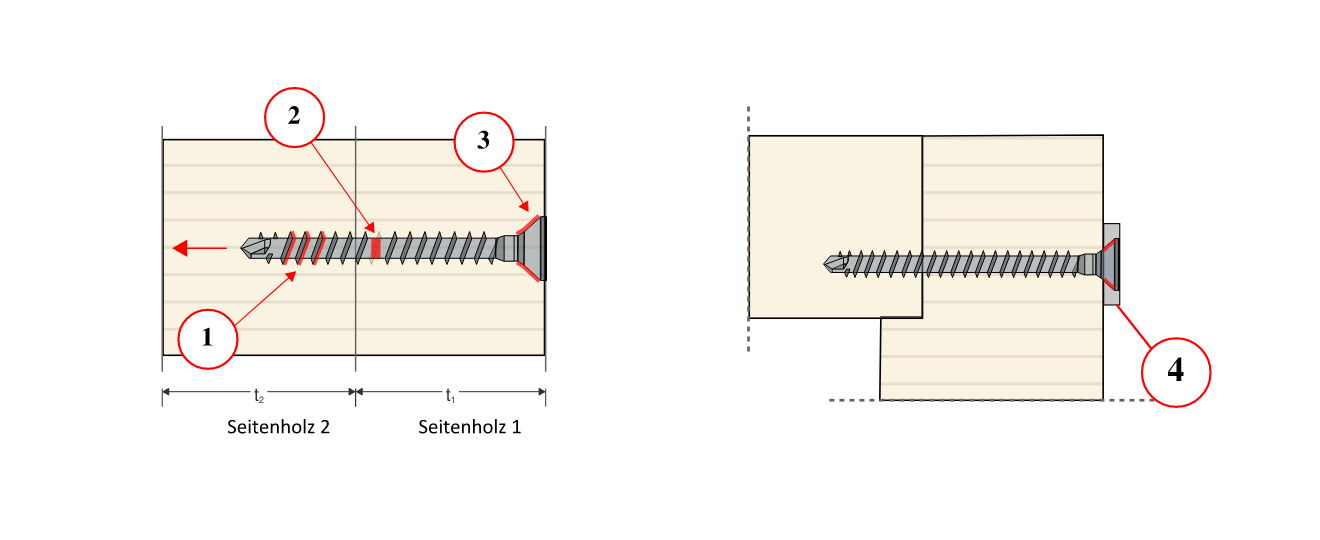

Im Wesentlichen sind folgende Parameter für die Axialtragfähigkeit erforderlich (vgl. Becker/Rautenstrauch 2012: 96):

- charakteristischer Wert des Ausziehparameters 𝑓𝑎𝑥𝑘
- charakteristischer Wert des Kopfdurchziehparameters 𝑓ℎ𝑒𝑎𝑑𝑘
- Winkel zur Faserrichtung 𝛼
- Rohdichtekennwert des Baustoffes 𝜌𝑘
- Durchmesser des Verbindungsmittels d
- Bauteildicken 𝑡1 und die effektive Länge des Gewindes 𝑙𝑒𝑓

Diese Parameter sind teils herstellerspezifisch und müssen der Europäischen Technischen Zulassung ETA-11/0190 für Würth Schrauben entnommen werden. Für alle weiteren Berechnungen und Anwendungen wird eine Würth ASSY plus VG als Senkkopf-Ausführung betrachtet. 

#### Eingangswerte
**Bibliotheken** <br>
Zu Beginn werden zunächst die Bibliotheken wie in Kapitel 2.3 erläutert geordnet und alphabetisch sortiert importiert.

In [6]:
from math import sqrt, cos, sin, pi
import pandas as pd
import handcalcs.render  

**Kennwerte** <br>
Es ist zu beachten, dass sich der Kopfdurchmesser und charakteristische Kopfdurchziehparameter je nach Ausführung der Schraube unterscheiden. Die Kennwerte der Schraube werden zunächst in verschachtelten Listen gespeichert und nach dem Durchmesser sortiert.

In [7]:
#Listen der herstellerspezifischen Kennwerte für Würth ASSY plus VG

##Liste der Durchmesser [mm]
L_d = [6, 8, 10, 12]

##Liste der Schraubenlängen [mm]
L_L = [[120,140,160,180,200,220,240,260], 
       [120,140,160,180,200,220,240,260,280,300,330,380,430,480,530,580], 
       [120,140,160,180,200,220,240,260,280,300,320,340,360,380,400,430,480,530,580,600,650,700,750,800], 
       [120,140,160,180,200,220,240,260,280,300,380,480,600]]

##Liste der char. Ausziehparameter [N/mm^2]
L_f_axk = [11.5, 11, 10, 10]

##Liste der Zugtragfähigkeiten [kN]
L_f_tensk = [11, 20, 32, 45]

##Liste der Kopfdurchmesser [mm]
L_d_h = [14, 22, 25.2, 29.4]

##Liste der char. Kopfdurchziehparameter [N/mm^2]
L_f_head = [13, 13, 10, 10]

**Eingabewerte** <br>
Für eine Besipielberechnung werden folgende Eingabewerte definiert:

In [8]:
#Eingabewerte
d = 6 #mm
L = 240 #mm
t_1 = 100 #mm
t_Blech = 0 #mm
rho_k = 350 #mm
alpha = 15

Mit der Ermittlung des Indexes für den Schraubendurchmesser, also der Position in der Liste, können die entsprechenden Kennwerte aus den Listen entnommen werden. Zusätzlich wird die effektive Eindringtiefe der Schraube berechnet. Die effektive Länge 𝑙𝑒𝑓 entspricht dem Mindestwert aus der Gewindelänge im zweiten Seitenholz und der Dicke des ersten Seitenholzes 𝑚𝑖𝑛(𝐿−𝑡1, 𝑡1) (s. Abb.xx).

In [9]:
#Bearbeitung der Eingabwerte
index = L_d.index(d)

d_h = L_d_h[index]
f_headk = L_f_head[index]
f_axk = L_f_axk[index]
f_tensk = L_f_tensk[index]
l_ef = min(L-t_1, t_1)
alph = alpha*pi/180

Für eine Zugbeanspruchung der Schraube werden nun die folgenden 3 Versagensmechanismen untersucht und die Tragfähigkeit berechnet. 

### Ausziehwiderstand

In Abschnitt A.1.3.1 der ETA ist der charakteristische Wert der Ausziehtragfähigkeit für Vollholz, Brettschichtholz, Brettsperrholz oder Furnierschichtholz definiert. Der Winkel zur Faserrichtung von 0° ≤ 𝛼 ≤ 90° wird mit einem Faktor 𝑘𝑎𝑥𝑘 berücksichtigt. 

In [10]:
##Ausziehwiderstand
if alpha <= 45:
    k_axk = 0.3+(0.7*alpha)/45
else:
    k_axk = 1

In [13]:
%%render 2
F_axrk1 = (k_axk*f_axk*d*l_ef) * (rho_k/350)**0.8 #N
F_axRk1 = F_axrk1/1000 #kN

<IPython.core.display.Latex object>

### Kopfdurchziehwiderstand

Der Widerstand der Schraube gegen das Kopfdurchziehen $F_{headRk}$ ist abhängig von der Querdruckspannung, die zwischen Schraubenkopf und Holz auftritt und errechnet sich aus dem Kopfdurchziehparameter $f_{headk}$ und dem Kopfdurchmesser $d_{h}$.

In [14]:
%%render 2
F_headrk = f_headk*d_h**2*(rho_k/350)**0.8 #N
F_headRk = F_headrk/1000 #kN

<IPython.core.display.Latex object>

### Zugfestigkeit

Die Zugfestigkeit einer Schraube ergibt sich für die entsprechende Festigkeitsklasse aus dem Produkt der Zugfestigkeit $f_{ub}$ und dem Schraubenquerschnitt $A$.

In [15]:
%%render 2
F_tRk = f_tensk #kN

<IPython.core.display.Latex object>

### Resultierende Axialtragfähigkeit

Bei Kombinationen mit Stahlblechen und Unterlegscheiben oder bei einer Seitenholzdicke größer als 4 mal der Schraubendurmesser $t_1 > 4d$ ist das Versagen infolge Kopfdurchziehen zu vernachlässigen. 

In [23]:
#Axialtragfähigkeit einer Vollgewindeschraube

##Bei Kombinationen mit Stahlblechen/Unterlegscheiben oder bei t_1 > 4d ist das Versagen\
##infolge Kopfdurchziehen zu vernachlässigen
if t_Blech != 0 or t_1 > 4*d:
    F_axRk = min(F_axRk1, F_tRk) #kN
    F_axrk = min(F_axrk1, F_tRk*1000) #N

elif t_Blech == 0 or t_1 < 4*d:
    F_axRk = min(F_axRk1, F_headRk, F_tRk) #kN
    F_axrk = min(F_axrk1, F_headrk, F_tRk*1000) #N

In [24]:
%%render 2
F_axRk #kN - Axialtragfähigkeit

<IPython.core.display.Latex object>

## Tragfähigkeit auf Abscheren

Rechtwinklig zur Stabachse wird bei der Ermittlung der Tragfähigkeit unterschieden in reine Holz-Holzverbindungen und Stahlblech-Holzverbindungen, die ein- oder mehrschnittig ausgeführt werden können. Die Tragfähigkeit auf Abscheren wird in der Scherfuge nachgewiesen und berücksichtigt die Einflüsse der Lochleibungsfestigkeit, die Fließgrenze und des Ausziehwiderstandes des Verbindungsmittels. Als Berechnungsmodell wird für diese Versagensmechanismen ein ideal-plastisches Verhalten zugrunde gelegt. Diese Vereinfachung beinhaltet, dass elastische Verformungen vernachlässigt werden. Im Eurocode 5 dient die sogenannte Fließgelenktheorie nach Johansen die Grundlage für die Bemessung von stiftförmigen Verbindungsmitteln.

Es sind folgende Parameter erforderlich:

- charakteristischer Wert der Lochleibungsfestigkeit $f_{hk}$
- charakteristisches Fließmoment $M_{yRk}$
- Winkel zur Faserrichtung $\alpha$
- Rohdichtekennwert des Baustoffes $\rho_{k}$
- Bauteildicken $t_{1}$
- Durchmesser des Verbindungsmittels d

In den kommenden Beispielen wird von der selben Holzrohdichte in beiden Seitenhölzern ausgegangen, sodass für die Lochleibungsfestigkeit $f_{hk} = f_{1hk} = f_{2hk}$ gilt. Der Winkel zur Faserrichtung $\alpha$ muss als Bogenmaß umgerechnet werden.

Der Nachweis eines Verbindungsmittels je Scherfuge berücksichtigt demnach verschiedene Versagensmechanismen.

Für eine einschnittige Holz-Holz-Verbindung werden folgende mögliche Mechanismen betrachtet:

- Versagen durch Überschreitung der Lochleibungsfestigkeit des Holzes
keine Verformung des Verbindungsmittels
Steigerung der Holzdicke vermeidet dieses Versagen

    1) Lochleibung Seitenholz 1

    2) Lochleibung Seitenholz 2

    3) Lochleibung in beiden Seitenhölzern
    
- Versagen durch Fließgelenkbildung
bei größeren Holzdicken platisches Biegeversagen mit plastischer Verformung
höchste Tragfähigkeit und duktiles Bauteilversagen

    4) Plastisches Moment im Seitenholz 2

    5) Plastisches Moment im Seitenholz 1

    6) Plastisches Moment in beiden Seitenhölzern

- Winkel zur Faserrichtung
- charakteristischer Wert der Lochleibungsfestigkeit
- Rohdichtekennwert des Baustoffes
- charakteristisches Fließmoment
- Bauteildicken
- Durchmesser des Verbindungsmittels

**Winkel zwischen Kraft- und Faserrichtung** <br>
Vor allem bei der Betrachtung der Lochleibungsfestigkeit spielt der Winkel zwischen Kraft und Faserrichtung eine bedeutende Rolle, da die Lochleibungsfestigkeit mit steigendem Winkel abnimmt. Folglich ist sie bei 0 Grad am größten. Dies wird wie folgt berücksichtigt. 

```Python
f_hk = (0.082*rho_k*d**(-0.3))/(2.5*cos(alph)**2+sin(alph)**2)
```


In [16]:
#%%symbolic
f_hk = (0.082*rho_k*d**(-0.3))/(2.5*cos(alph)**2+sin(alph)**2)

In [ ]:
#Ermittlung der Kennwerte

f_hk = (0.082*rho_k*d**(-0.3))/(2.5*cos(alph)**2+sin(alph)**2)
M_yrk = 0.15*600*d**(2.6)

### Einschnittige Holz-Holz-Verbindung

#### Lochleibungsversagen

Beim Lochleibunsgversagen findet keine Verformung im Holz statt und führt zu einem spröden Bauteilversagen im Holz. Dieses Versagen kann durch eine Steigerung der Bauteildicken vermieden werden. 

In [ ]:
#Lochleibungswiderstand im Seitenholz 1

F_vk1 = f_hk*t_1*d
print('F_vk1 = ' +str(round(F_vk1/1000,2)) + ' kN (Lochleibungswiderstand im Seitenholz 1)')

In [ ]:
#Lochleibungswiderstand im Seitenholz 2

F_vk2 = f_hk*l_ef*d
print('F_vk2 = ' +str(round(F_vk2/1000,2)) + ' kN (Lochleibungswiderstand im Seitenholz 2)')

In [ ]:
#Lochleibungswiderstand in beiden Seitenhölzern

F_vk3 = (f_hk*t_1*d)/2 * ( sqrt(1+2*(1+l_ef/t_1+(l_ef/t_1)**2)+(l_ef/t_1)**2)-(1+l_ef/t_1))+F_axrk/4
print('F_vk3 = ' +str(round(F_vk3/1000,2)) + ' kN (Lochleibungswiderstand in beiden Seitenhölzern)')

#### Entstehung eines Fließgelenks

Bei größeren Holzdicken erfolgt ein platisches Biegeversagen mit plastischer Verformung. Dieser Versagensmechanismus resultiert in höhere Tragfähigkeiten und einem duktilen Bauteilversagen.

In [ ]:
#Fließgelenk im Seitenholz 1

F_vk4 = 1.05*(f_hk*t_1*d)/(3) * (sqrt(4+(12*M_yrk)/(f_hk*t_1**2*d))-1)+F_axrk/4
print('F_vk4 = ' +str(round(F_vk4/1000,2)) + ' kN (Fließgelenk im Seitenholz 1)')

In [ ]:
#Fließgelenk im Seitenholz 2

F_vk5 = 1.05*(f_hk*l_ef*d)/(3) * (sqrt(4+(12*M_yrk)/(f_hk*l_ef**2*d))-1)+F_axrk/4
print('F_vk5 = ' +str(round(F_vk5/1000,2)) + ' kN (Fließgelenk im Seitenholz 2)')

In [ ]:
#Fließgelenke in beiden Seitenhölzern

F_vk6 = 1.15*sqrt(2*M_yrk*f_hk*d)+F_axrk/4
print('F_vk6 = ' +str(round(F_vk6/1000,2)) + 'kN (Fließgelenke in beiden Seitenhölzern)')

#### Resultierende Schertragfähigkeit

In [ ]:
#Resultierende Schertragfähigkeit

F_vrk = min(F_vk1, F_vk2, F_vk3, F_vk4, F_vk5, F_vk6)
print('F_vrk = ' +str(round(F_vrk/1000,2)) + ' kN (Resultierende Schertragfähigkeit)')

### Einschnittige Holz-Stahl-Verbindung (dickes Blech)
Bei einer Verbindung, bei der die Dicke des Stahlblechs größer als der Schraubendurchmesser ist, wird von einem dicken Stahlblech ausgegangen ($t_{Blech}>d$). In diesem Fall wird das Verbindungsmittel vom Stahlblech eingespannt.

Seileffekt

In [ ]:
#Lochleibungswiderstand im Seitenholz 1
F_vk1 = f_hk*t_1*d
print('F_vk1 = ' +str(round(F_vk1/1000,2)) + ' kN (Lochleibungswiderstand im Seitenholz 1)')

In [ ]:
#Fließgelenk im Seitenholz
F_vk2 = f_hk*t_1*d*(sqrt(2+(4*M_yrk)/(f_hk*d*t_1**2))-1)+F_axrk/4
print('F_vk2 = ' +str(round(F_vk2/1000,2)) + ' kN (Fließgelenk im Seitenholz)')

In [ ]:
#2 Fließgelenke
F_vk3 = 2.3*sqrt(M_yrk*f_hk*d)+F_axrk/4
print('F_vk3 = ' +str(round(F_vk3/1000,2)) + ' kN (2 Fließgelenke)')

In [ ]:
#Resultierende Schertragfähigkeit
F_vrk = min(F_vk1, F_vk2, F_vk3)
print('F_vrk = ' +str(round(F_vrk/1000,2)) + ' kN (Resultierende Schertragfähigkeit)')

### Einschnittige Holz-Stahl-Verbindung (dünnes Blech)
Ein dünnes Stahlblech ist definiert mit einer Dicke kleiner als die Hälfte des Schraubendurchmessers ($t_{Blech}<0,5d$).

In [ ]:
#Lochleibungswiderstand im Seitenholz 1
F_vk1 = 0.4*f_hk*t_1*d
print('F_vk1 = ' +str(round(F_vk1/1000,2)) + ' kN (Lochleibungswiderstand im Seitenholz 1)')

In [ ]:
#Fließgelenk im Seitenholz
F_vk2 = 1.15*sqrt(2*M_yrk*f_hk*d)+F_axrk/4
print('F_vk2 = ' +str(round(F_vk2/1000,2)) + ' kN (Fließgelenk im Seitenholz)')

In [ ]:
#Resultierende Schertragfähigkeit
F_vrk = min(F_vk1, F_vk2)
print('F_vrk = ' +str(round(F_vrk/1000,2)) + ' kN (Resultierende Schertragfähigkeit)')

# Literaturverzeichnis

[1] Deutsches Institut für Bautechnik. 2016. Europäische Technische Zulassung ETA-11/0190, Würth Schrauben. Berlin: .. <br>
[2] DIN EN 1995-1-1:2010-12, Eurocode 5: Bemessung und Konstruktion von Holzbauten - Teil 1-1: Allgemeines-Allgemeines regeln und Regeln für den Hochbau; Deutsche Fassung EN 1995-1-1:2004+AC:2006+A1:2008